# E2a: Küchentischversuch zum Laval-Rotor

Name: Alexander Neubauer  
Datum: 4.1.2024  

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Mit welchen Frequenzen vibrieren Handys?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/heimversuch1.JPEG" width="500">

- Beschreibung des Aufbaus: Der Bewegungssensor wird auf die Rückseite des Handys geklebt.
- Vorgangsbeschreibung: Das Handy wird durch ein Timer/Wecker zum vibrieren gebracht. Die Messung wird gestartet und ist nach 20 Sekunden fertig.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240104_162813_AlexanderNeubauer_mi9" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240104_162813_AlexanderNeubauer_mi9.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240104_162813_AlexanderNeubauer_mi9/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240104_162813_AlexanderNeubauer_mi9/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240104_162813_AlexanderNeubauer_mi9/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaaf1f-c8a7-6598-bb09-e2e4296fa364": {
    "type": "probe",
    "name": "mi9",
    "comment": "",
    "path": "measurement_data

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
data = h5py.File(path_measurement_folder + "/" +h5_file_name, "r")
#Messdaten auslesen und in acc_x/acc_y/acc_z als Liste speichern
  
acc_x = np.array(data["RawData"][sensor_settings_dict["ID"]]["acceleration_x"])
acc_y = np.array(data["RawData"][sensor_settings_dict["ID"]]["acceleration_y"])
acc_z = np.array(data["RawData"][sensor_settings_dict["ID"]]["acceleration_z"])
time = np.array(data["RawData"][sensor_settings_dict["ID"]]["timestamp"])
data.close()

#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
acc = get_vec_accel(acc_x,acc_y,acc_z) #Betrag der Beschleunigung berechnen

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0, 0.5, 'delta time in sec')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


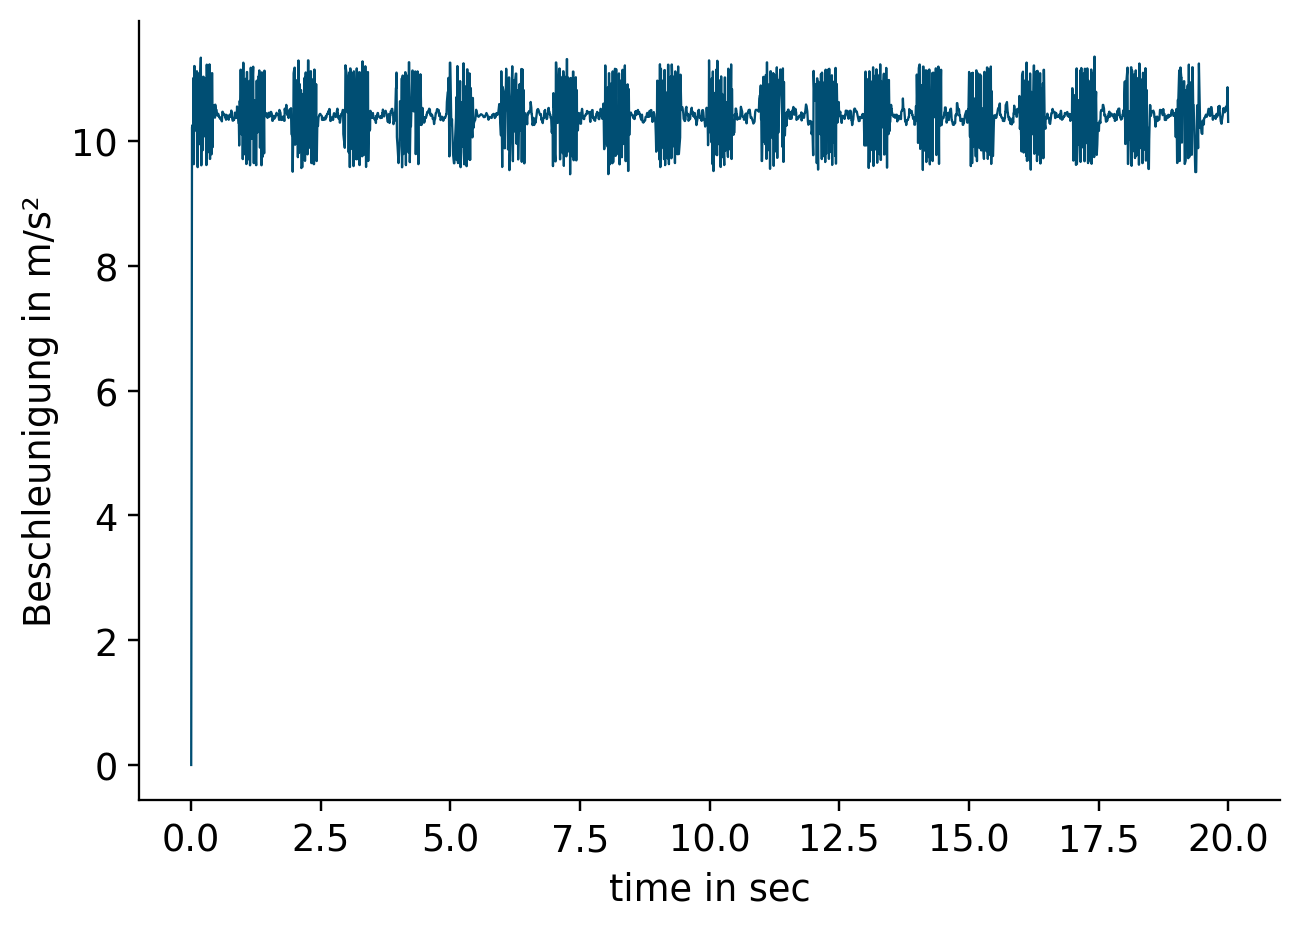

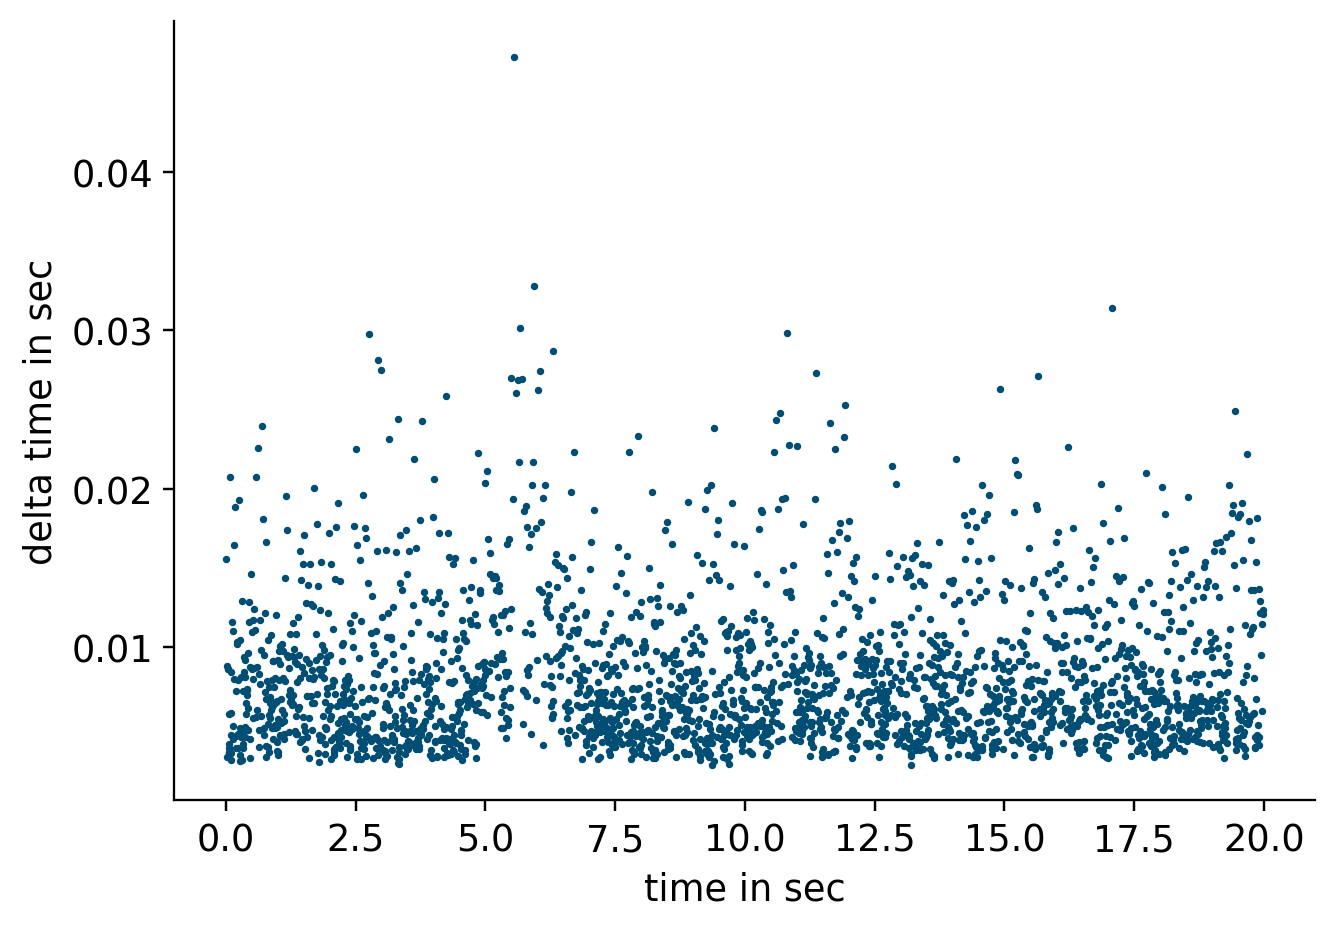

In [6]:
#Plot der Beschleunigung über der Zeit
delta_time = time[1:]-time[:-1]
fig1 = plt.figure()
plt.plot(time, acc)
plt.xlabel("time in sec")
plt.ylabel("Beschleunigung in m/s²")
#Plot der Zeitdifferenz zum nächsten Messpunkt über der Zeit
fig2 = plt.figure()
plt.scatter(time[:-1],delta_time,s=2)
plt.xlabel("time in sec")
plt.ylabel("delta time in sec")

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
acc_interp = interpolation(time,acc) #interpolation der Daten

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

(array([1.88471461e-12, 2.09836983e+01, 2.82257869e+01, ...,
       5.37242194e+00, 2.82257869e+01, 2.09836983e+01]), array([ 0.  ,  0.05,  0.1 , ..., -0.15, -0.1 , -0.05]))


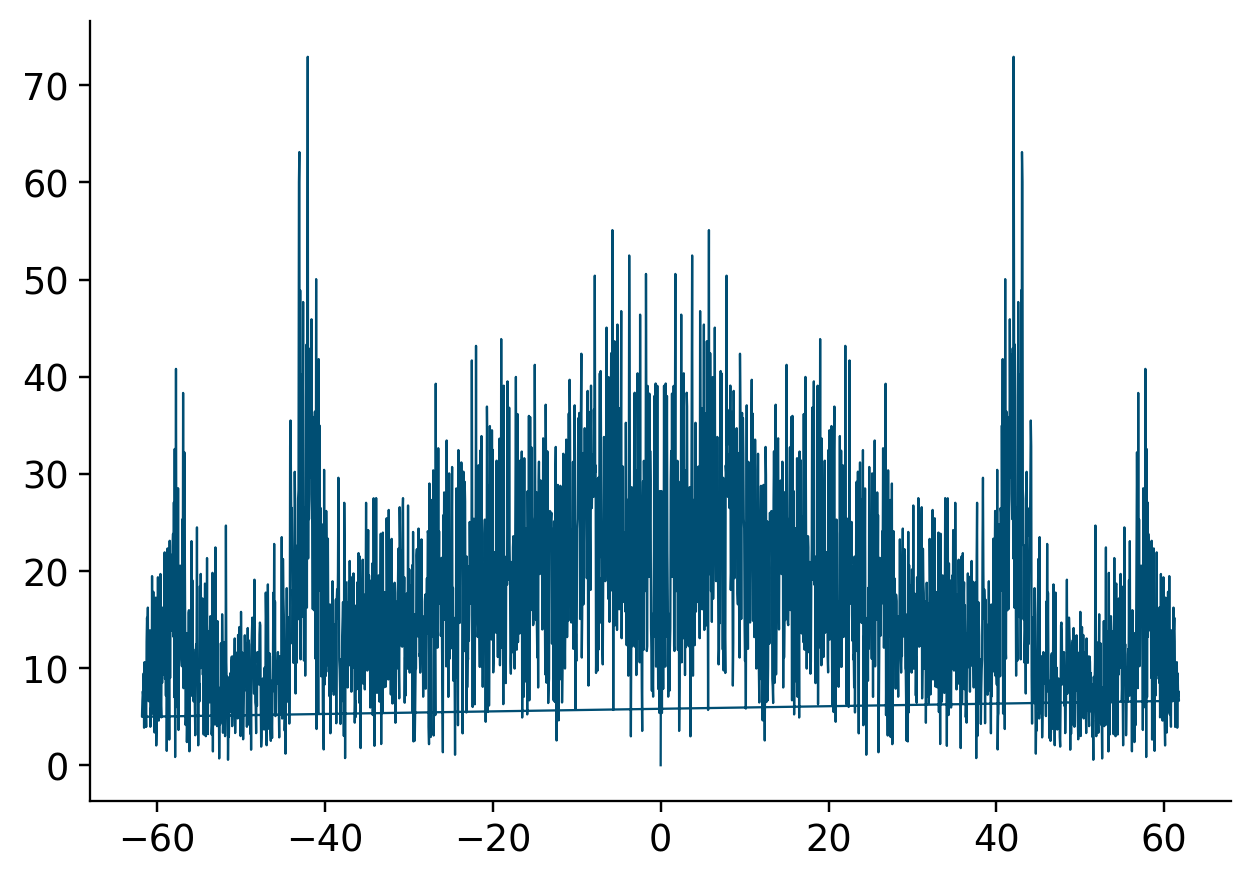

In [8]:
# -------------------------------------------------------------------------------------------#5-start
data_frq_bereich  = my_fft(acc_interp,time)
plt.plot(data_frq_bereich[1],data_frq_bereich[0])
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="image/heimversuch1.jpg" width="500">

- Beschreibung des Aufbaus: siehe Versuch 1 (diesmal mit einem Iphone)
- Vorgangsbeschreibung: siehe Versuch 1

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = "measurement_data/data_20240104_163625_AlexanderNeubauer_iphone12mini" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240104_163625_AlexanderNeubauer_iphone12mini.h5" # replace None by the filename of the hdf5-file

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
data = h5py.File(path_measurement_folder + "/" +h5_file_name, "r")
acc_x = np.array(data["RawData"][sensor_settings_dict["ID"]]["acceleration_x"])
acc_y = np.array(data["RawData"][sensor_settings_dict["ID"]]["acceleration_y"])
acc_z = np.array(data["RawData"][sensor_settings_dict["ID"]]["acceleration_z"])
time = np.array(data["RawData"][sensor_settings_dict["ID"]]["timestamp"])
data.close()

#### 2. Betrag der Beschleunigung berechnen


In [11]:
acc = get_vec_accel(acc_x,acc_y,acc_z)

#### 3. Darstellung der Messdaten

Text(0, 0.5, 'delta time in sec')

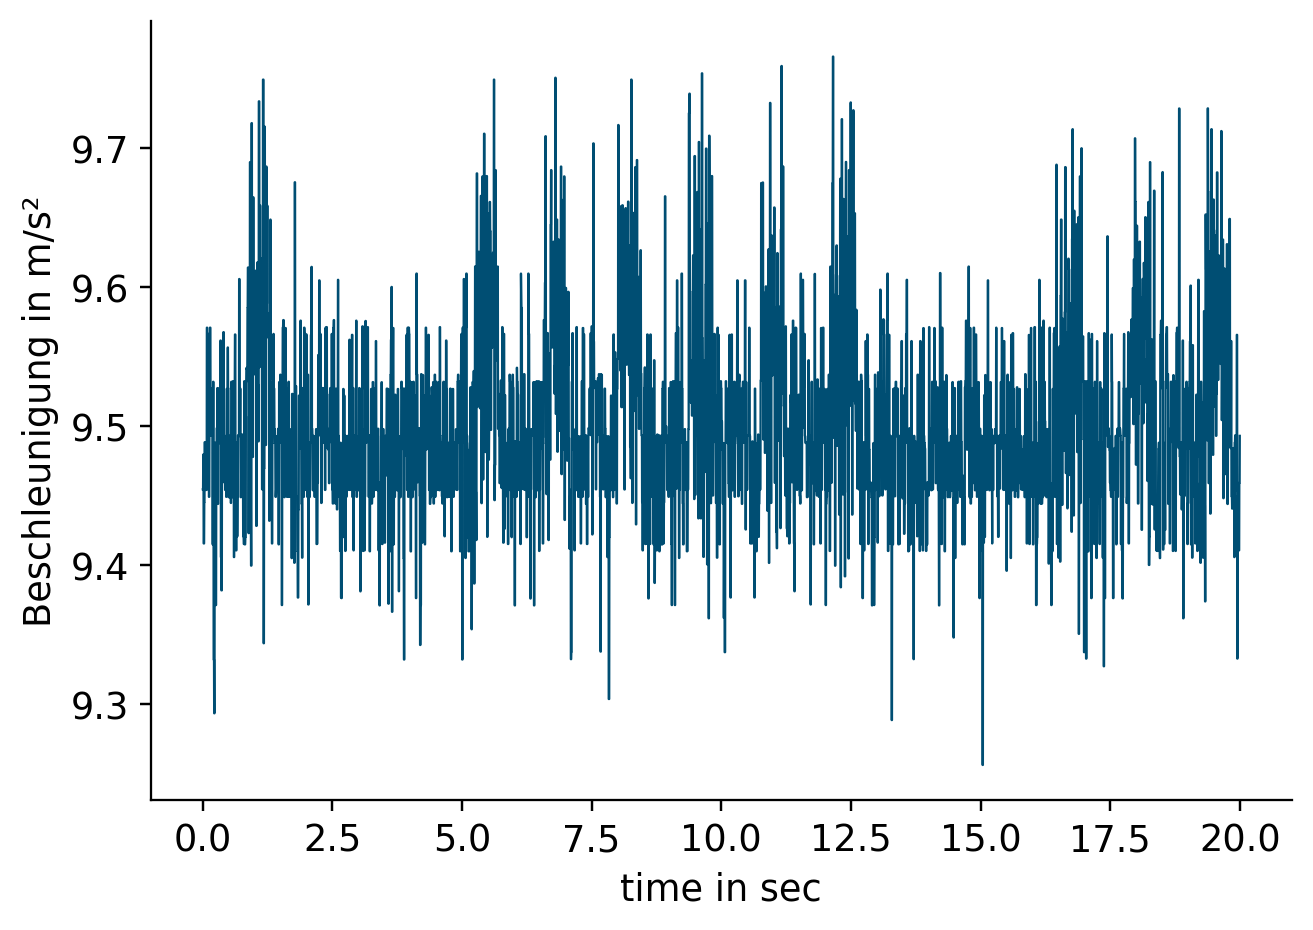

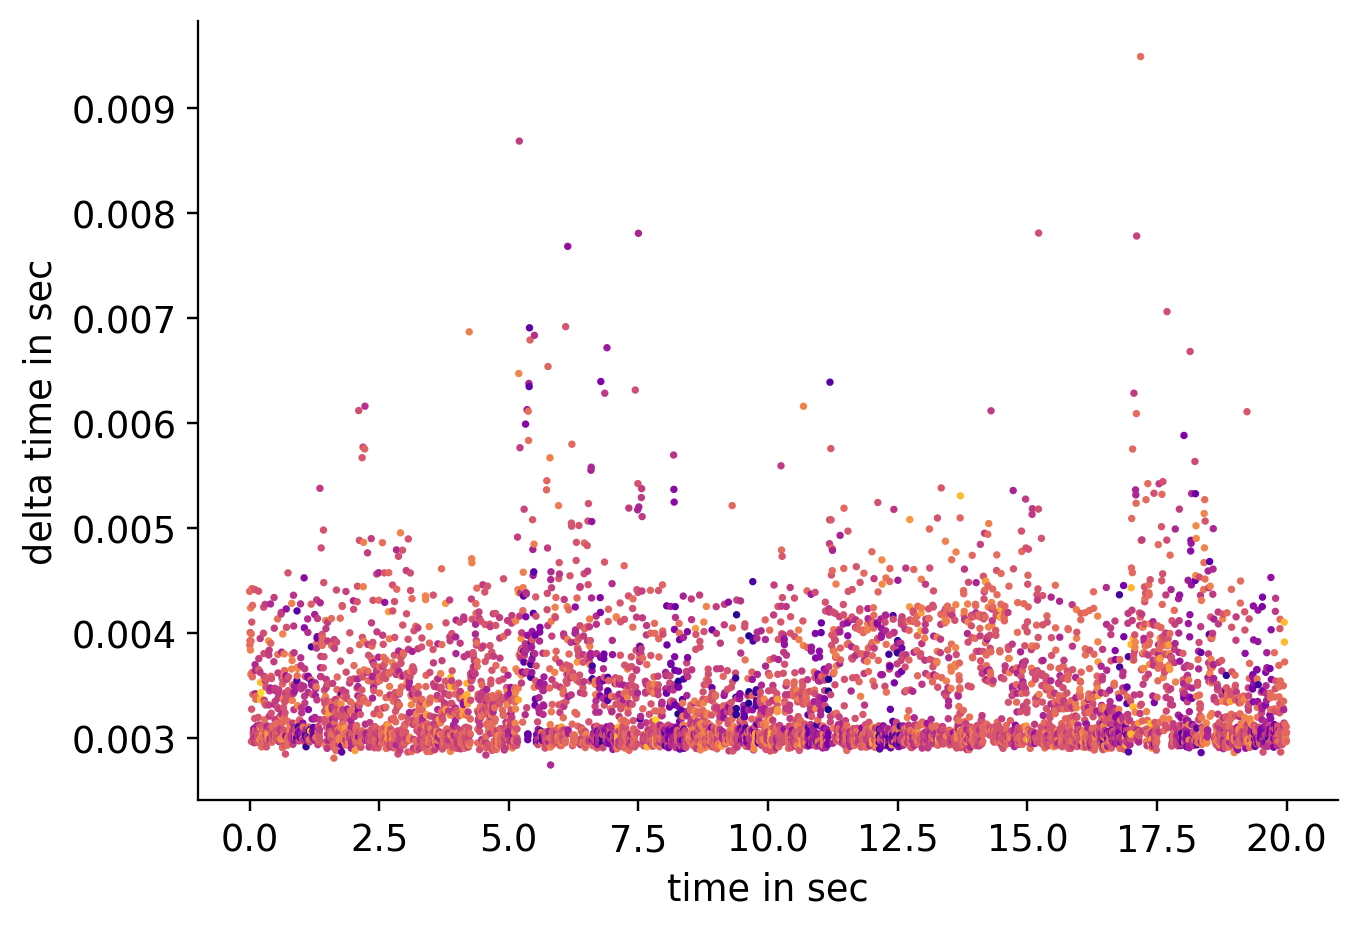

In [16]:
#Plotten der Beschleunigung über die Zeit
delta_time = time[1:]-time[:-1]
fig1 = plt.figure()
plt.plot(time, acc)
plt.xlabel("time in sec")
plt.ylabel("Beschleunigung in m/s²")
#Plotten der zeitlichen Differenz zum nächsten Messpunkt über die Zeit, die Farbe der Punkte entspricht der Beschleungung
fig2 = plt.figure()
plt.scatter(time[:-1],delta_time,s=2,c = acc[:-1],cmap = "plasma_r")
plt.xlabel("time in sec")
plt.ylabel("delta time in sec")


#### 4. Interpolation der Messwerte



In [13]:
acc_interp = interpolation(time,acc)

#### 5 & 6. FFT durchführen und graphisch darstellen


(array([4.48119374e-12, 1.81998502e+01, 3.50113701e+01, ...,
       2.11951780e+01, 3.50113701e+01, 1.81998502e+01]), array([ 0.  ,  0.05,  0.1 , ..., -0.15, -0.1 , -0.05]))


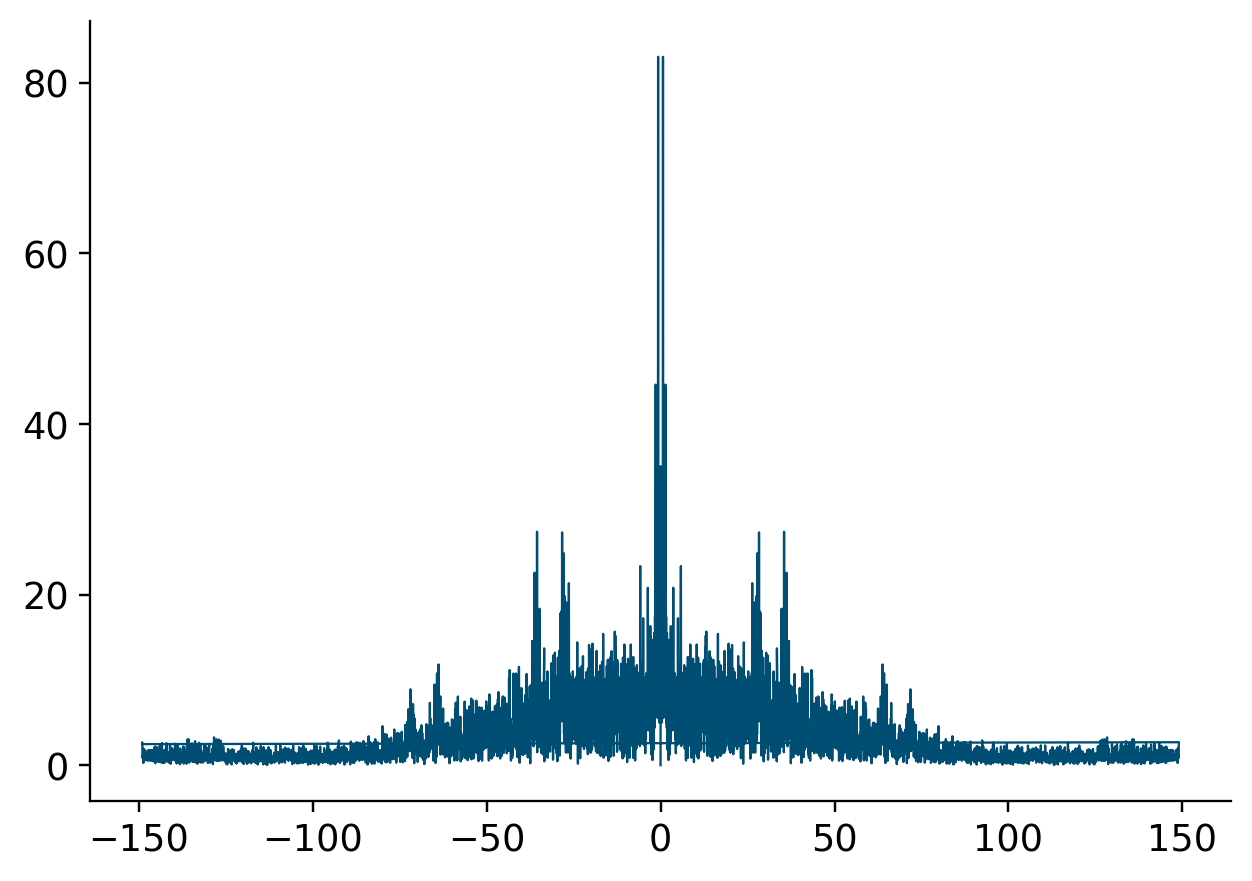

In [14]:
data_frq_bereich  = my_fft(acc_interp,time)
plt.plot(data_frq_bereich[1],data_frq_bereich[0])

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Die Versuchsergebnisse sind mit Vorsicht zu geniesen. Zum einen ist durch den Versuchsaufbau, Sensor auf das Handy kleben, keine direkte Übertragung der Vibration gewehrleistet, zum Anderen sind die Störgrößen relativ groß, was die große Menge an verschiednen Freqenzen erklären würde. Außderem wurde zum Vibrieren der Handys eine Vibrationsmuster benutzt, was das Auslesen der Vibrationsfrequenz erschwert. 

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.